# Support Vector Machines - Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

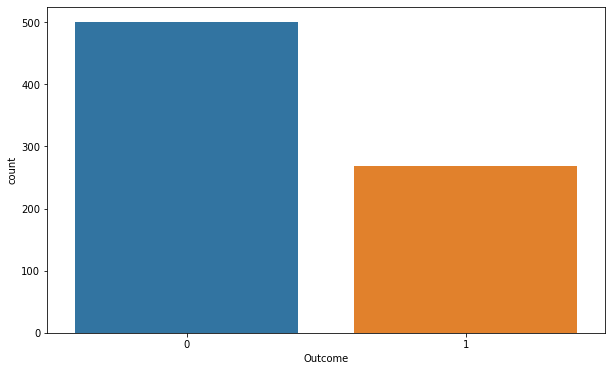

In [8]:
sns.countplot(df.Outcome);

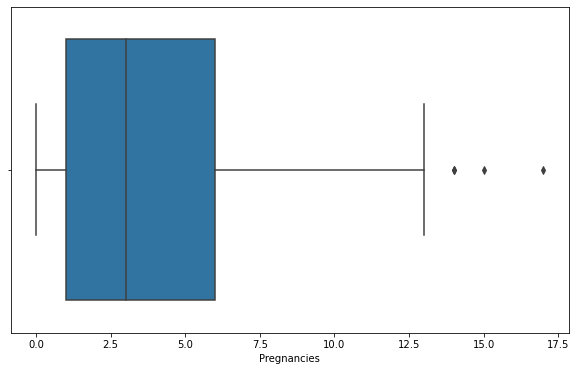

In [9]:
sns.boxplot(df.Pregnancies);

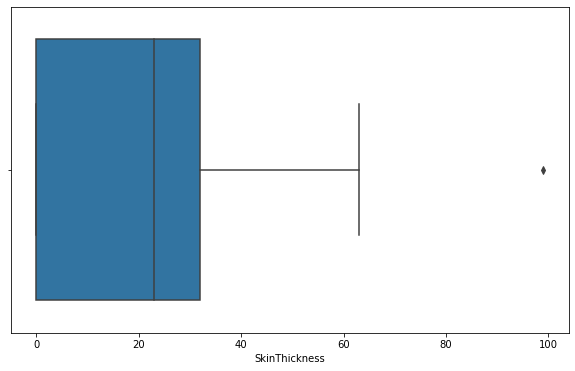

In [10]:
sns.boxplot(df.SkinThickness);

In [11]:
df=df[df.SkinThickness<70]

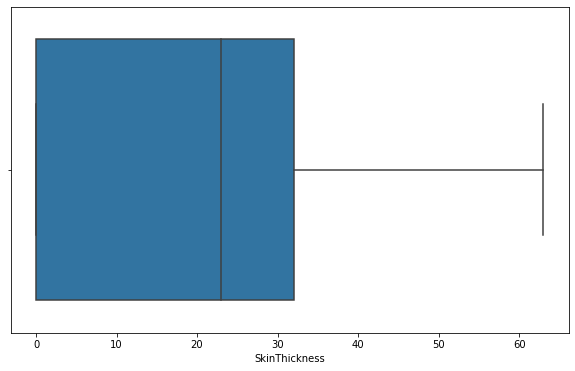

In [12]:
sns.boxplot(df.SkinThickness);

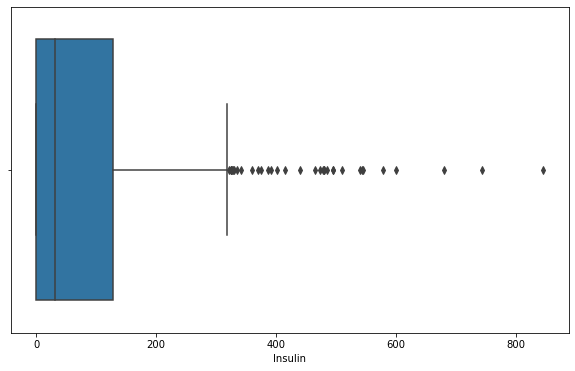

In [13]:
sns.boxplot(df.Insulin);

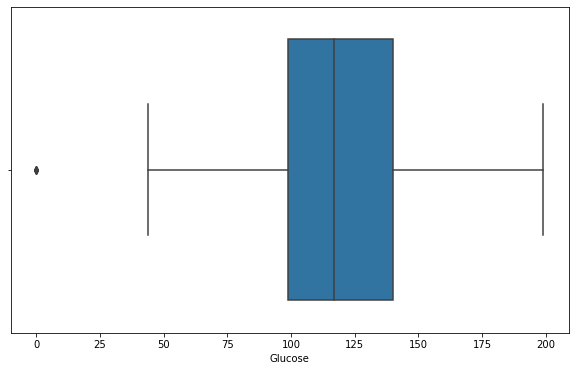

In [14]:
sns.boxplot(df.Glucose);

In [15]:
df=df[df.Glucose>0]

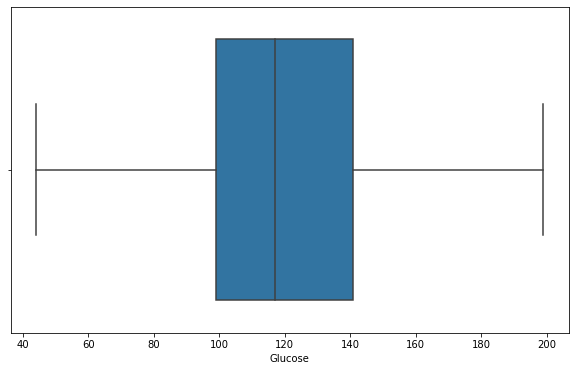

In [16]:
sns.boxplot(df.Glucose);

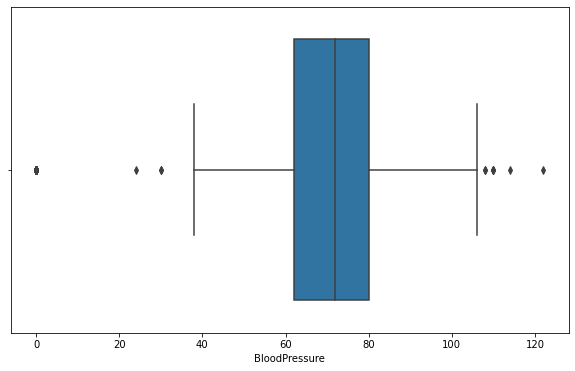

In [17]:
sns.boxplot(df.BloodPressure);

In [18]:
df=df[df.BloodPressure>35]

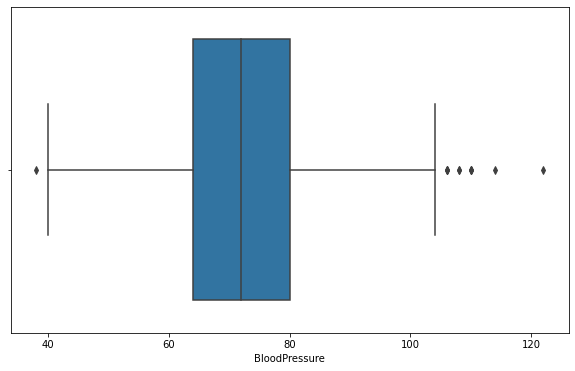

In [19]:
sns.boxplot(df.BloodPressure);

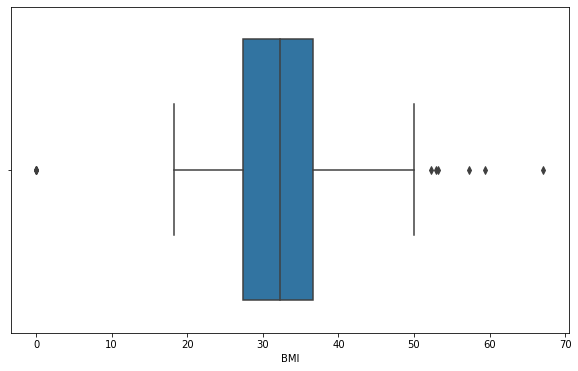

In [20]:
sns.boxplot(df.BMI);

In [21]:
df=df[df.BMI>0]

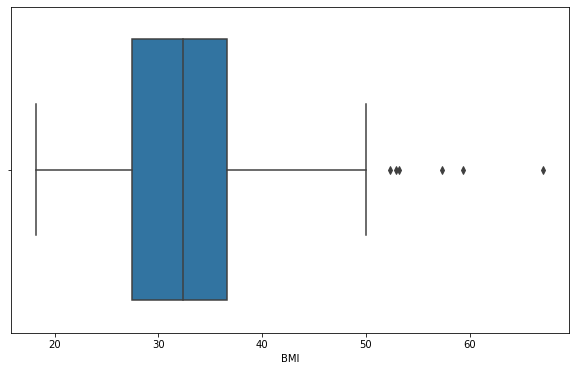

In [22]:
sns.boxplot(df.BMI);

In [23]:
df.shape

(720, 9)

In [24]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

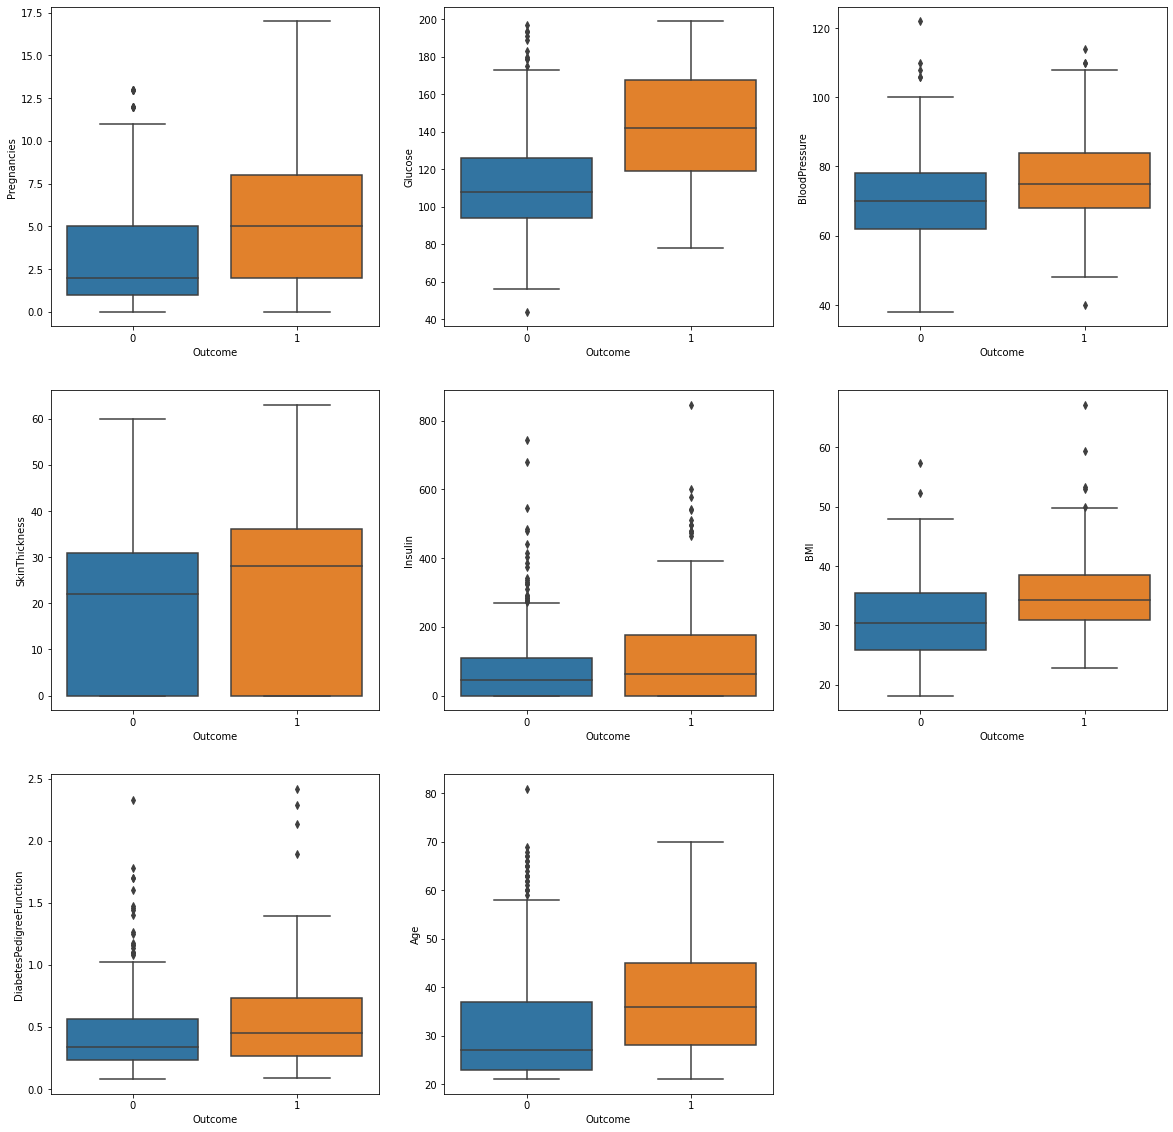

In [25]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

<AxesSubplot:>

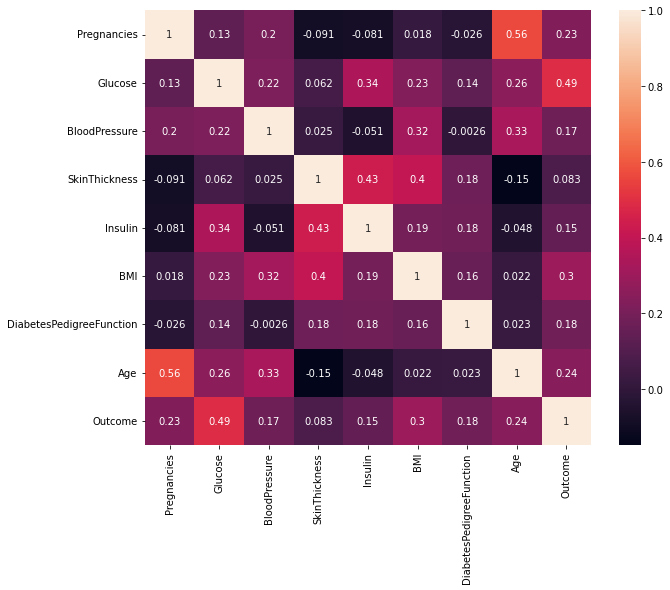

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

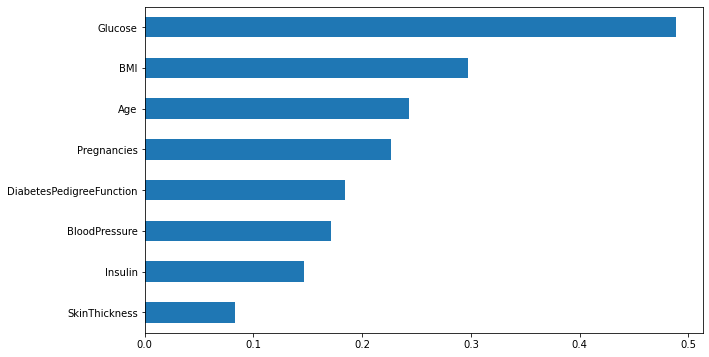

In [27]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

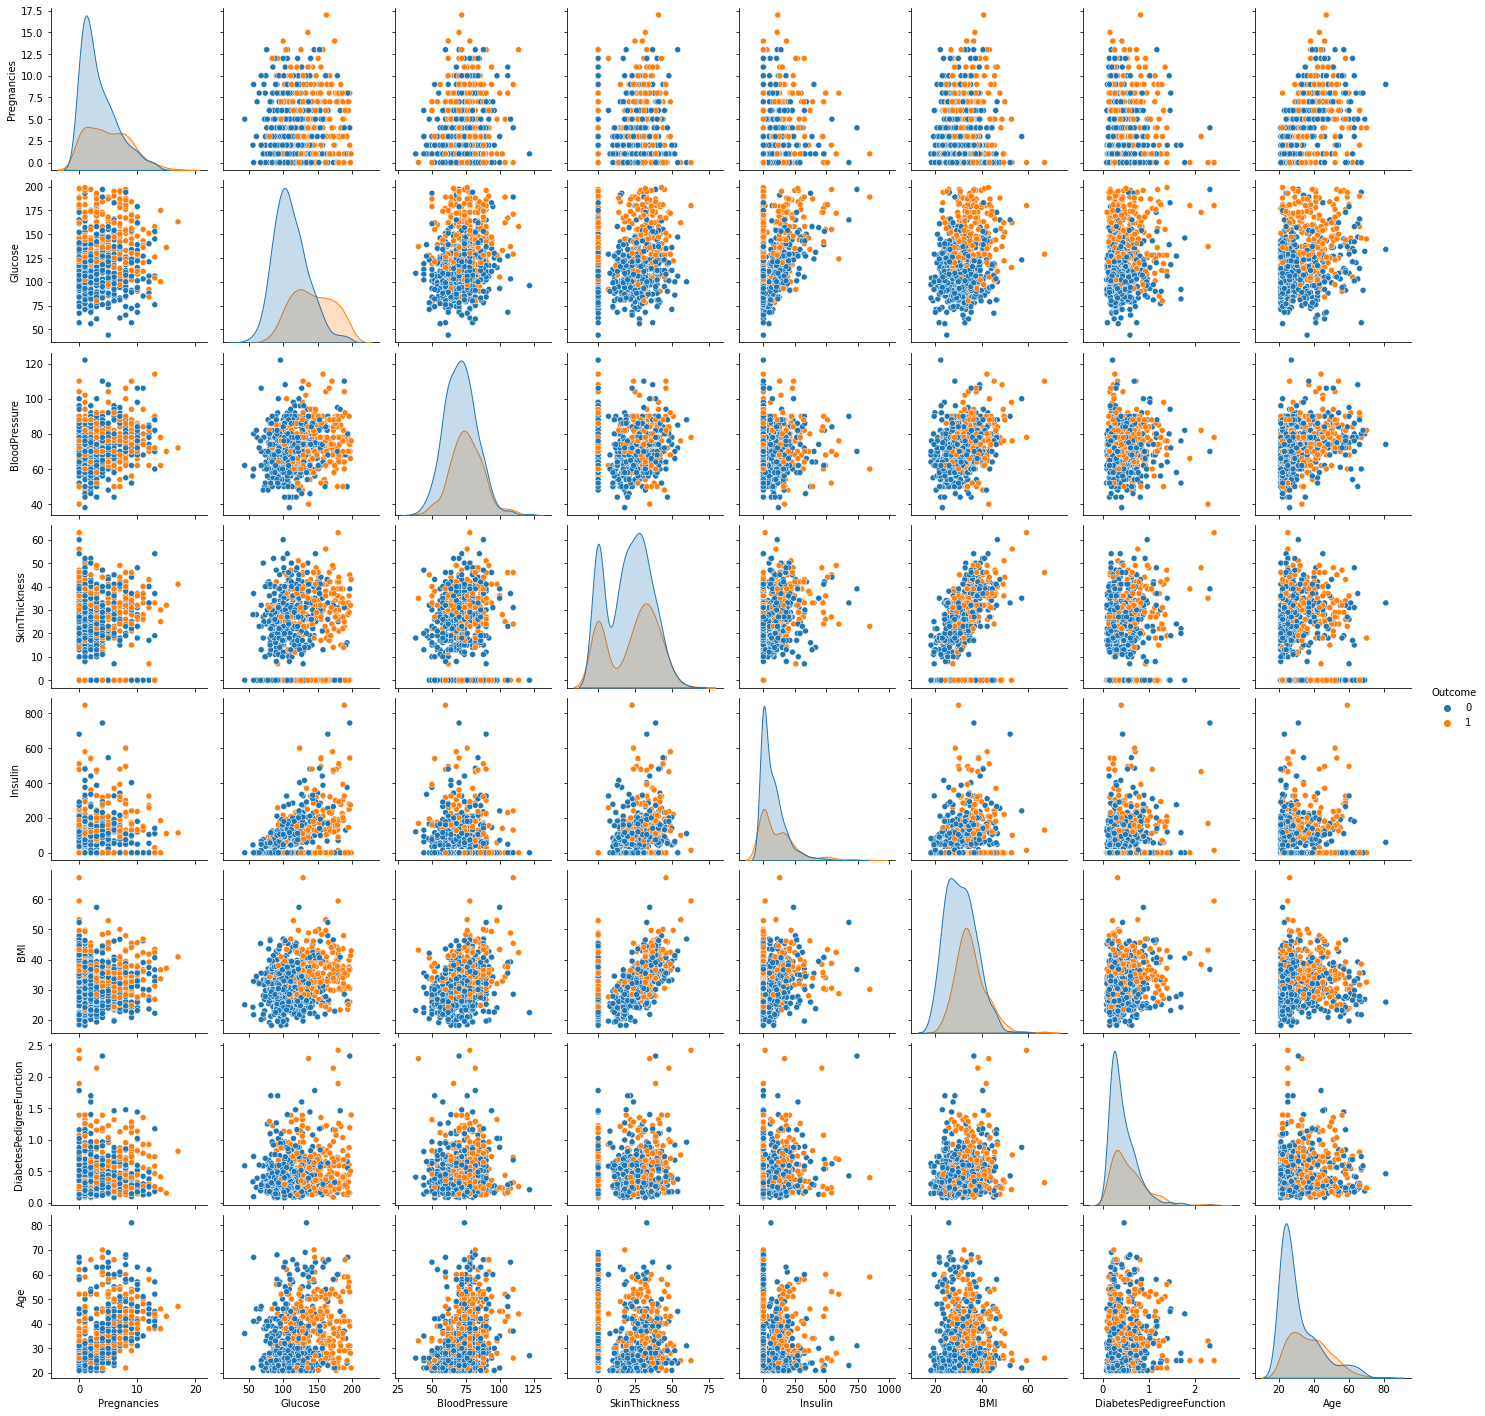

In [28]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

## Modelling and Model Performance

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Without Scalling

* SVM de scale olmazsa olmazdır. sonuçları görmek için yapıyoruz

In [34]:
svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)

eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[90  5]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        95
           1       0.83      0.51      0.63        49

    accuracy                           0.80       144
   macro avg       0.81      0.73      0.75       144
weighted avg       0.80      0.80      0.78       144


Train_Set
[[347  31]
 [110  88]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       378
           1       0.74      0.44      0.56       198

    accuracy                           0.76       576
   macro avg       0.75      0.68      0.69       576
weighted avg       0.75      0.76      0.74       576



score larımıza baktığımızda accuracy yüksek olmasına rağmen diğer scorelarımızın düşük olduğunu görüyoruz. ilk başta farkettiğimiz datamızın unbalance olma durumu scoreların düşük çıkmasıyla tescillenmiş oldu. 
* unbalance durumda accuracy scorelarına bakılmaz. recall ve f1 scoreları önemlidir.

modelimiz 0 ları başarılı tahmin etmiş gibi görünüyor fakat 1 leri tahmin etme konusunda başarısız. bizim için hedef class 1 score ları daha önemlidir. buda unbalance durumdan kaynaklı olarak class 1 verilerinin az olmasından öğrenme yetersizliğinden olabilir. class 0 scoreları uyumlu olduğu için 0 ları öğrenmiş demek münkün. burada 0 lar için tam olarak sallamış diyemiyoruz. score lar bunun tersi olsaydı class 1 leri tahminde başarılı diyebilirdik ve daha tercih edilebilir olurdu. 

train score ları ile  test score ları arasında uyum var gibi ama train score larının daha kötü olması; random dağılım yapılırken train setine denk gelen verinin daha kötü olduğunu gösteriyor. Datanın iyi kısmı test setine denk gelmiş olabilir. aşağıda CV sonrası score lara baktığımızda da bu durum destekleniyor. CV sonrası score lar train seti score ları ile uyumlu.

In [35]:
from sklearn.model_selection import cross_validate

model = SVC(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.738
test_precision   0.708
test_recall      0.420
test_f1          0.520
dtype: float64

### With Scalling

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [37]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [38]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[347  31]
 [ 74 124]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       378
           1       0.80      0.63      0.70       198

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.82      0.82      0.81       576



In [39]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.752
test_precision   0.673
test_recall      0.536
test_f1          0.594
dtype: float64

### With Best Parameters (GridsearchCV)

### Grid Search burdan başlıyor

In [40]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear']}

In [46]:
svm_model_grid.get_params         # bu kod bloğu aşağıdan yukarı taşındı. normal yeri 1 alt kod satırı. 
                                  # pipeline da parametrelerin nasıl yazılacağı unutulursa get_params ile bakılabilir.

<bound method BaseEstimator.get_params of GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall')>

In [45]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="recall", cv=10)

In [86]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall')

In [87]:
svm_model_grid.best_params_

{'SVC__C': 0.05, 'SVC__gamma': 0.3, 'SVC__kernel': 'rbf'}

In [88]:
pd.DataFrame(svm_model_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,param_SVC__gamma,param_SVC__kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057,0.003,0.005,0.000,0.001,scale,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC_...",0.000,0.000,...,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.200,0.400,25
1,0.028,0.002,0.002,0.003,0.001,scale,linear,"{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC_...",0.500,0.550,...,0.750,0.800,0.600,0.632,0.684,0.650,0.550,0.642,0.090,21
2,0.057,0.003,0.003,0.002,0.001,auto,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 'auto', 'SVC__...",0.000,0.000,...,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.200,0.400,25
3,0.028,0.002,0.003,0.002,0.001,auto,linear,"{'SVC__C': 0.001, 'SVC__gamma': 'auto', 'SVC__...",0.500,0.550,...,0.750,0.800,0.600,0.632,0.684,0.650,0.550,0.642,0.090,21
4,0.057,0.003,0.004,0.001,0.001,0.200,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 0.2, 'SVC__ker...",0.000,0.000,...,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.200,0.400,25
5,0.028,0.002,0.002,0.002,0.001,0.200,linear,"{'SVC__C': 0.001, 'SVC__gamma': 0.2, 'SVC__ker...",0.500,0.550,...,0.750,0.800,0.600,0.632,0.684,0.650,0.550,0.642,0.090,21
6,0.057,0.003,0.005,0.000,0.001,0.300,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 0.3, 'SVC__ker...",0.000,0.000,...,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.200,0.400,25
7,0.029,0.002,0.002,0.002,0.001,0.300,linear,"{'SVC__C': 0.001, 'SVC__gamma': 0.3, 'SVC__ker...",0.500,0.550,...,0.750,0.800,0.600,0.632,0.684,0.650,0.550,0.642,0.090,21
8,0.053,0.003,0.002,0.002,0.050,scale,rbf,"{'SVC__C': 0.05, 'SVC__gamma': 'scale', 'SVC__...",0.800,0.750,...,0.900,0.950,0.750,0.895,0.895,0.900,0.750,0.844,0.072,5
9,0.022,0.002,0.003,0.002,0.050,scale,linear,"{'SVC__C': 0.05, 'SVC__gamma': 'scale', 'SVC__...",0.550,0.600,...,0.800,0.750,0.650,0.737,0.789,0.750,0.650,0.703,0.080,9


In [89]:
svm_model_grid.best_index_

14

In [90]:
svm_model_grid.best_score_

0.8942105263157896

In [91]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[45 50]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        95
           1       0.48      0.94      0.63        49

    accuracy                           0.63       144
   macro avg       0.71      0.71      0.63       144
weighted avg       0.78      0.63      0.63       144


Train_Set
[[190 188]
 [ 19 179]]
              precision    recall  f1-score   support

           0       0.91      0.50      0.65       378
           1       0.49      0.90      0.63       198

    accuracy                           0.64       576
   macro avg       0.70      0.70      0.64       576
weighted avg       0.76      0.64      0.64       576



In [92]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True, 
                                                        class_weight="balanced", random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.616
test_precision   0.475
test_recall      0.894
test_f1          0.618
dtype: float64

### probability Parametresi

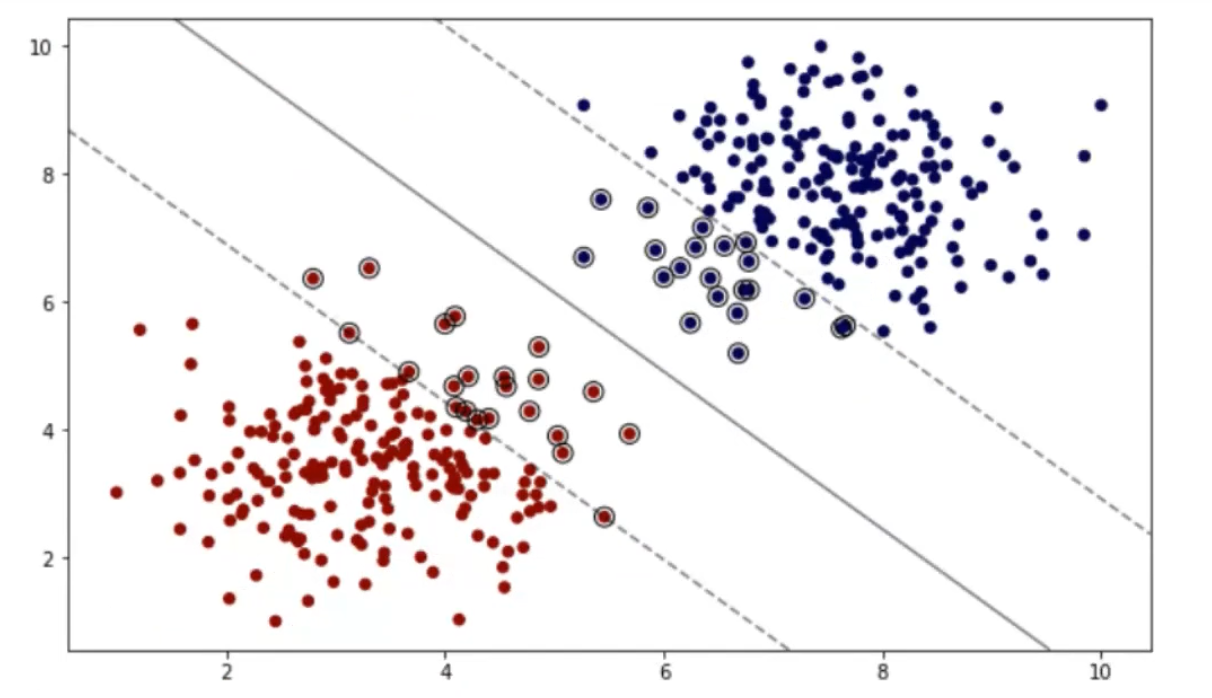

In [48]:
svm_model.decision_function(X_test)

array([-0.35490689,  0.9930003 , -0.54182557, -1.40902828,  0.71123042,
       -1.68074675, -0.95861807,  0.60872574, -1.69626418, -1.08781313,
       -1.16327694, -0.63238801, -1.23702941, -1.07386282,  0.83842825,
       -1.61065063, -1.22736066,  0.18824644, -0.1020222 , -1.11460995,
       -0.52633467, -1.59718974,  1.09611064, -1.50340685, -1.36268406,
       -1.37472125, -1.56473495, -0.18808975, -0.53843322, -1.40933033,
       -1.33343604,  0.25168947, -0.50713441, -1.18926333,  0.38123213,
       -1.41328557, -0.93549729, -0.80012742, -0.13200492, -1.42583784,
       -1.13348614, -1.37245884, -1.7787221 ,  0.64790419, -0.24325626,
       -0.71871088, -0.94468088,  0.54539445,  0.76268124, -1.08387535,
       -1.55176055, -1.55813389, -0.51357698, -1.95103268, -1.78604709,
        0.76736416, -0.38777737, -1.14527306, -0.63271394, -0.55463493,
        0.49229454,  0.27796789, -0.00382438,  1.59398835,  1.40235202,
       -1.21202631, -1.32125808, -0.53600465,  1.48613497, -1.49

yukardaki görsel ve kod satırında elde edilen sonuçları incelediğimizde negati değerler class 0 ı pozitif değerler class 1 i temsil ediyor. - ve + değer mutlak değer olarak ne kadar büyükse class 0 ve 1 merkezine okadar yakındırlar. merkeze olan mesafe 0 yada 1 olma olasılığına dönüştürülüyor. 

olasılık durumu olduğundan ROC/AUC yada PCR a bakılabilir

## Overall performance of the model

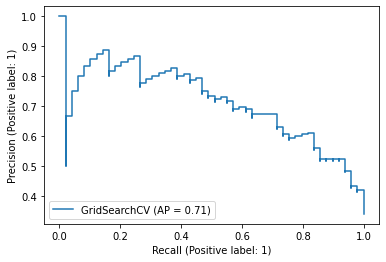

In [94]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
plot_precision_recall_curve(svm_model_grid, X_test, y_test);

## Finding Best Threshold for max recall score

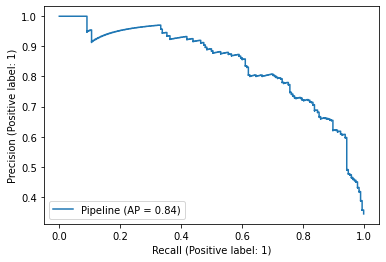

In [95]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
svc_basic_model = Pipeline(steps=operations)

svc_basic_model.fit(X_train, y_train)
plot_precision_recall_curve(svc_basic_model, X_train, y_train);

In [96]:
y_pred_proba = svc_basic_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.8415032373442909

In [97]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [98]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3069561306924304

In [99]:
y_pred2 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [100]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[59 36]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        95
           1       0.54      0.86      0.66        49

    accuracy                           0.70       144
   macro avg       0.72      0.74      0.70       144
weighted avg       0.77      0.70      0.71       144



In [101]:
y_train_pred2 = pd.Series(svm_model_grid.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[229 149]
 [ 29 169]]
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       378
           1       0.53      0.85      0.66       198

    accuracy                           0.69       576
   macro avg       0.71      0.73      0.69       576
weighted avg       0.77      0.69      0.70       576



yukardaki sonuçlar ile GridSearch sonrası elde ettiğimiz aşağıdaki score larla karşılaştırdığımızda test setimiz için precision 0.48 ten 0.54 e, f1 0.63 ten 0.66 ya çıkmış recall ise 0.94 ten 0.86 ya düşmüş. burdan şu yorumu yapabiliriz. her ne kadar recall değerimiz düşmüş olsada precision ve f1 scorelarımızın yükselmiş olması optimum noktanın burası olduğunu gösterir. zaten treshold tespitinden sonra aldığımız score lar optimum scoreları verir bunada dikkat.

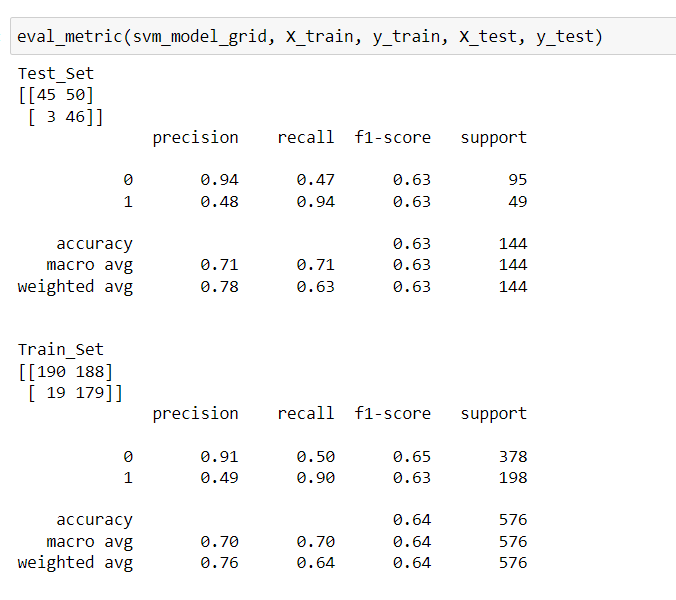

In [102]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [103]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True, 
                                                        class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations)
CV(10, model, X_train, y_train, optimal_threshold)

Accuracy      66.82%  std 6.92%
Precision-1   51.26%  std 5.80%
Recall-1      84.84%  std 10.52%
F1_score-1    63.76%  std 6.85%
